# Задание из четвёртой лабы

Обучите один из алгоритмов классификации из библиотеки sklearn. Объяснять принцип работы классификатора в этой лабораторной не требуется

1. Выберите один из датасетов первой лабораторной


2. Найдите в данных признак, который будете предсказывать
    
    Если это категория, то у неё должно быть от 2 до 10 значений (например колонка species в датасете миграции птиц содержит 3 категории)
    
    Если признак количественный, то его нужно дискретизировать (например для популярности трека в датасете spotify можно разделить треки на 3 категории: 0-20 - популярные, 21-50 - обычные, 51 - 100 - непопулярные). Полученную категорию записать в датафрейм как отдельную колонку


3. Выделите признаки для предсказания
    
    Используйте от 2 до 5 количественных признаков для предсказания целевой переменной


4. Проверьте нормальность количественных признаков
    
    Используйте статистический тест из лекции. Если распределение является лог-нормальным, логарифмируйте его и проверьте на нормальность
    
    Как минимум 1 из признаков должен быть нормальным


5. Покажите качество предсказания модели с помощью метрик

    Метрика должна учитывать баланс классов в датасете

In [47]:
import pandas as pd

spot_tracks = pd.read_csv('./SpotifyFeatures.csv')
spot_tracks = spot_tracks.sample(200)
spot_tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
90539,Hip-Hop,Flo Rida,Who Dat Girl (feat. Akon),7z73ehYAn9O1XP9XlCqVtd,58,0.00683,0.719,200880,0.616,0.000031,C#,0.0742,-3.951,Major,0.0395,124.963,4/4,0.625
28392,Anime,Jin,Yobanashi Deseive,0mkNGxmIlBCtkNeWr0PY0n,36,0.00767,0.515,201426,0.977,0.000171,B,0.3320,-2.603,Minor,0.2610,127.813,4/4,0.603
42190,Folk,Death Cab for Cutie,Title And Registration,6LTQAaWl0Nrnt45ln6iKf3,54,0.33300,0.752,219267,0.566,0.130000,A,0.1080,-9.640,Major,0.0324,115.794,4/4,0.727
131292,Reggae,MAGIC!,Lay You Down Easy,4FTOFgpECL4tlu8DljL0XM,53,0.04760,0.644,163246,0.868,0.000000,F#,0.2800,-5.301,Major,0.0738,89.971,4/4,0.947
22108,Dance,Miguel,Shockandawe,11SY8jJkg1CtUgHx37qUlm,44,0.35200,0.766,150730,0.902,0.000000,C,0.4970,-7.067,Major,0.1040,109.032,4/4,0.470


In [48]:
spot_tracks.drop(['genre',
                  'duration_ms',
                  'instrumentalness',
                  'key',
                  'liveness',
                  'loudness',
                  'mode',
                  'speechiness',
                  'tempo',
                  'time_signature',
                  'valence',
                  'artist_name',
                  'track_name',
                  'track_id'], axis = 1, inplace = True) 
spot_tracks.head() 

,popularity,acousticness,danceability,energy
90539,58,0.00683,0.719,0.616
28392,36,0.00767,0.515,0.977
42190,54,0.33300,0.752,0.566
131292,53,0.04760,0.644,0.868
22108,44,0.35200,0.766,0.902


In [49]:
spot_tracks.describe()


,popularity,acousticness,danceability,energy
count,200.000000,200.000000,200.000000,200.000000
mean,42.045000,0.368949,0.536197,0.562893
std,18.663187,0.367267,0.190948,0.274388
min,0.000000,0.000094,0.068200,0.001510
25%,30.000000,0.028600,0.415500,0.380500
50%,44.000000,0.207000,0.545500,0.605500
75%,55.000000,0.686250,0.662000,0.788000
max,87.000000,0.995000,0.962000,0.977000


In [50]:
def discretize(pop) : 
    if (pop > 50):
        return 1 #Non-Popular
    if (pop < 20):
        return 3 #High-Popular
    else :
        return 2 #Mid-Popular
    
spot_tracks['discretize_popularity'] = spot_tracks.popularity.apply(discretize)

spot_tracks.drop('popularity', axis = 1, inplace = True)

In [51]:
spot_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 90539 to 171698
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acousticness           200 non-null    float64
 1   danceability           200 non-null    float64
 2   energy                 200 non-null    float64
 3   discretize_popularity  200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.8 KB


In [52]:
spot_tracks.head()

,acousticness,danceability,energy,discretize_popularity
90539,0.00683,0.719,0.616,1
28392,0.00767,0.515,0.977,2
42190,0.33300,0.752,0.566,1
131292,0.04760,0.644,0.868,1
22108,0.35200,0.766,0.902,2


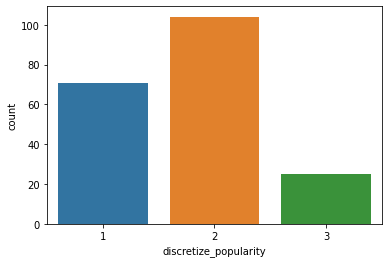

In [53]:
import seaborn as sns

sns.countplot(x='discretize_popularity', data = spot_tracks);

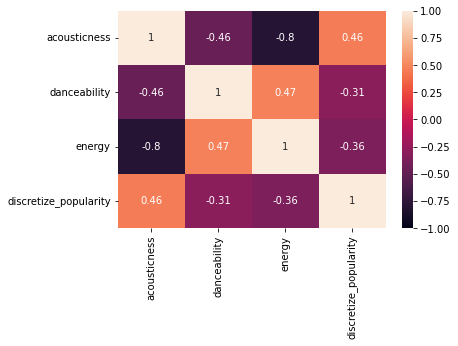

In [54]:
sns.heatmap(spot_tracks.corr(), vmin=-1, vmax=1, annot=True);

In [55]:
def discretize(popularity) :
    if (popularity == 1):
        return "high"
    if (popularity == 2):
        return "medium"
    else :
        return "low"

discretize_popularity = spot_tracks.discretize_popularity.apply(discretize)
spot_tracks.drop('discretize_popularity', axis = 1, inplace = True)
spot_tracks.head()

,acousticness,danceability,energy
90539,0.00683,0.719,0.616
28392,0.00767,0.515,0.977
42190,0.33300,0.752,0.566
131292,0.04760,0.644,0.868
22108,0.35200,0.766,0.902


In [56]:
from scipy import stats

print(stats.normaltest(spot_tracks.acousticness))
print(stats.normaltest(spot_tracks.danceability))
print(stats.normaltest(spot_tracks.energy))

NormaltestResult(statistic=215.0028047676588, pvalue=2.0546324733960031e-47)
NormaltestResult(statistic=3.0097618960656, pvalue=0.2220437270009617)
NormaltestResult(statistic=22.532820307888546, pvalue=1.279558774425228e-05)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def run(scorer):
    knn_clf = KNeighborsClassifier()
    svm_clf = SVC()
    forest_clf = RandomForestClassifier()

    knn_acc_score = cross_val_score(knn_clf,
                                    spot_tracks,
                                    discretize_popularity,
                                    scoring = scorer,
                                    cv=7).mean()
    svm_acc_score = cross_val_score(svm_clf,
                                    spot_tracks,
                                    discretize_popularity,
                                    scoring = scorer,
                                    cv=7).mean()
    forest_acc_score = cross_val_score(forest_clf,
                                    spot_tracks,
                                    discretize_popularity,
                                       scoring = scorer,
                                       cv=7).mean()

    leaderboard = sorted([
        ('KNN', knn_acc_score),
        ('SVC', svm_acc_score),
        ('Forest', forest_acc_score)
    ], key=lambda pair: pair[1], reverse=True)

    print('Leaderboard:')
    for idx, (leader_name, leader_score) in enumerate(leaderboard):
        print(f'{idx + 1}. {leader_name}: {leader_score}')

In [75]:
run(make_scorer(f1_score, average='macro'))

Leaderboard:
1. KNN: 0.49967534066123587
2. Forest: 0.4579958207145512
3. SVC: 0.4135288181198234


In [76]:
run(make_scorer(f1_score, average='micro'))

Leaderboard:
1. SVC: 0.590253342716397
2. Forest: 0.5899014778325123
3. KNN: 0.5649190710767066


In [77]:
run(make_scorer(f1_score, average='weighted'))

Leaderboard:
1. Forest: 0.5635600751379427
2. KNN: 0.5548114726379826
3. SVC: 0.5457205952781641


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(spot_tracks,
                                                    discretize_popularity,
                                                    shuffle=True,
                                                    stratify=discretize_popularity,
                                                    test_size=0.2)

knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

for clf in [knn_clf, svm_clf, forest_clf]:
    clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
forest_pred = forest_clf.predict(X_test)

knn_acc_score = balanced_accuracy_score(y_test, knn_pred)
svm_acc_score = balanced_accuracy_score(y_test, svm_pred)
forest_acc_score = balanced_accuracy_score(y_test, forest_pred)

leaderboard = sorted([
    ('KNN', knn_acc_score),
    ('SVC', svm_acc_score),
    ('Forest', forest_acc_score)
], key=lambda pair: pair[1], reverse=True)

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. Forest: 0.5380952380952381
2. KNN: 0.4714285714285715
3. SVC: 0.42063492063492064
